In [8]:
# %%
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import h5py


parent_dir = os.path.dirname(os.getcwd())
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

# from utils.data_splitter import TimeSeriesSplitter
# from utils.load_meso_session import MesoscopeSession
# from Activity_Data_Loader import Dataset_Activity


In [9]:
# Load covariate matrix directly from HDF5
session_path = "/cs/student/projects1/aibh/2024/gcosta/mpci_data/session_5ea6bb9b-6163-4e8a-816b-efe7002666b0_7.h5"

try:
    with h5py.File(session_path, 'r') as f:
        # Print available keys first to debug
        print("Available keys in HDF5:", list(f.keys()))

        activity = f['activity'][:]
        covariate_matrix = f['covariate_matrix'][:]

        # Check if covariate_metadata exists and has the expected structure
        if 'covariate_metadata' in f:
            covariate_metadata = f['covariate_metadata']
            print("Covariate metadata keys:", list(covariate_metadata.keys()))

            if 'feature_names' in covariate_metadata:
                feature_names = [name.decode('utf-8') for name in covariate_metadata['feature_names'][:]]
            else:
                feature_names = ["Unknown"] * covariate_matrix.shape[1]
        else:
            feature_names = ["Unknown"] * covariate_matrix.shape[1]

        # Get smoothing info from metadata
        if 'preprocessing_stats' in f and 'smoothing_effect' in f['preprocessing_stats'].attrs:
            smoothing = f['preprocessing_stats'].attrs['smoothing_effect']
        else:
            smoothing = "Unknown"

    print(f"Activity shape: {activity.shape}")
    print(f"Covariate shape: {covariate_matrix.shape}")
    print(f"Covariate features: {feature_names}")
    print(f"Smoothing: {smoothing}")

except Exception as e:
    print(f"Error reading HDF5 file: {e}")


Available keys in HDF5: ['activity', 'covariate_matrix', 'covariate_metadata', 'metadata', 'neuron_mask', 'normalization', 'preprocessing_stats', 'quality_metrics', 'timestamps', 'trial_data']
Covariate metadata keys: ['feature_names']
Activity shape: (18309, 7)
Covariate shape: (18309, 11)
Covariate features: ['wheel_velocity', 'stimulus_catch_trial', 'stimulus_left_100pct', 'stimulus_left_25pct', 'stimulus_left_12.5pct', 'stimulus_left_6.25pct', 'stimulus_right_100pct', 'stimulus_right_25pct', 'stimulus_right_12.5pct', 'stimulus_right_6.25pct', 'trial_phase']
Smoothing: Unknown


In [10]:
# with h5py.File(session_path, 'r') as f:
#       smoothing_effect = f['preprocessing_stats']['temporal_smoothing'].attrs['smoothing_effect']

# print(f"Smoothing effect: {smoothing_effect}")

In [11]:
activity.mean()

np.float32(0.18814254)

<Axes: >

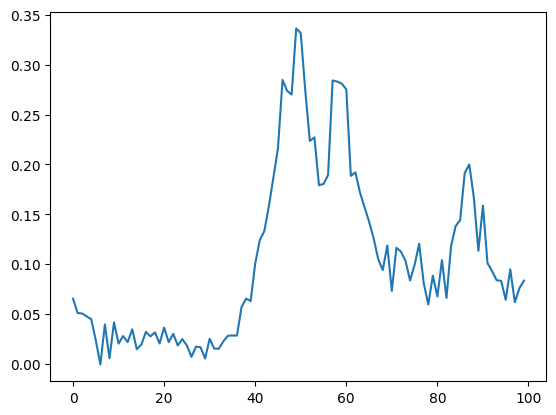

In [12]:
sns.lineplot(activity[0:100, 0])

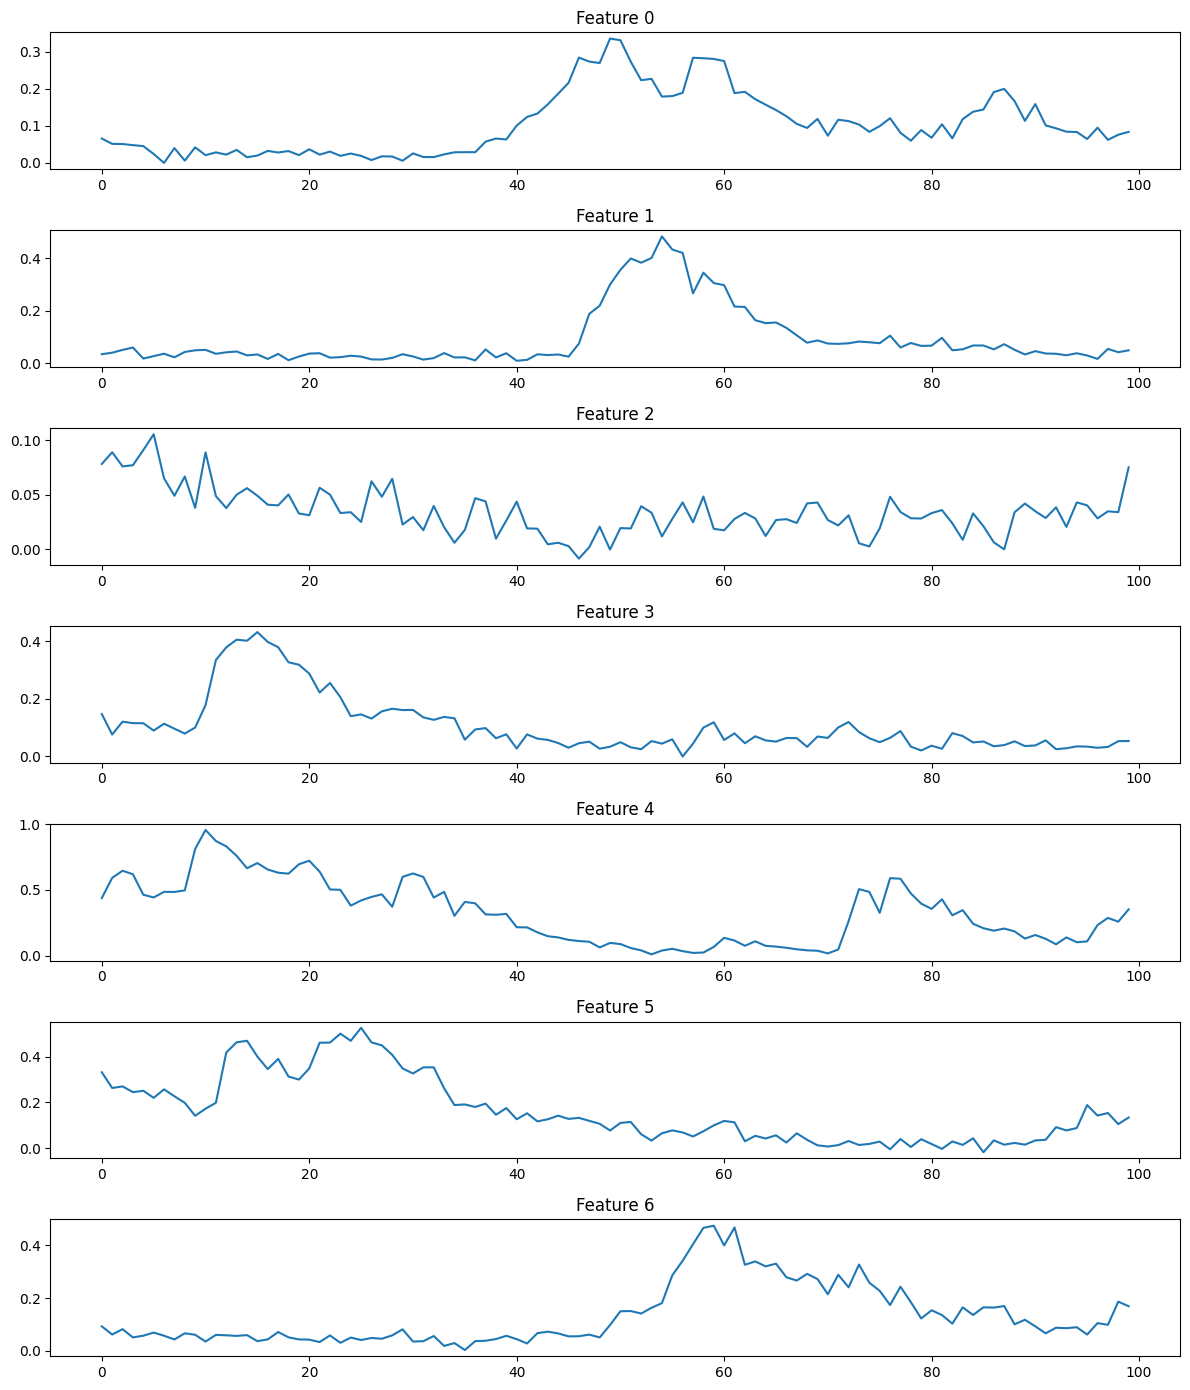

In [13]:


fig, axes = plt.subplots(7, 1, figsize=(12, 14))
for i in range(7):
    sns.lineplot(x=range(100), y=activity[0:100, i], ax=axes[i])
    axes[i].set_title(f'Feature {i}')
    
plt.tight_layout()
plt.show()


In [1]:
import torch

t = torch.zeros(100)

In [30]:
t = torch.ones(100, 100,)
t

tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]])

In [31]:
t.sum()

tensor(10000.)

In [32]:
t = t.reshape(10, -1)
t

tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]])

In [35]:
t.view()

TypeError: view() received an invalid combination of arguments - got (), but expected one of:
 * (torch.dtype dtype)
 * (tuple of ints size)
